In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import django
from django.db.models import Q

In [2]:
os.chdir("..")
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'billboard.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true" 
django.setup()

In [3]:
from rankings.models import Song

In [4]:
songs = Song.objects.all().values()
df_songs = pd.DataFrame(songs)
df_songs.head()

,id,title,artist,rank,chart_date,album_name,peak_position,weeks_on_chart,label,genre,weeks_at_no_1,last_week
0,83,A Bar Song (Tipsy),Shaboozey,4,2024-05-31,A Bar Song (Tipsy),3,6,EXPLICIT,,0,4
1,84,Lunch,Billie Eilish,5,2024-05-31,HIT ME HARD AND SOFT,5,1,NONE,,0,0
2,85,Espresso,Sabrina Carpenter,6,2024-05-31,Espresso,4,6,EXPLICIT,,0,9
3,86,Lose Control,Teddy Swims,7,2024-05-31,Lose Control,1,41,NONE,,0,6
4,88,Too Sweet,Hozier,9,2024-05-31,Unheard,1,9,NONE,,0,10


In [5]:
avg_weeks = df_songs['weeks_on_chart'].mean()
print(f"Average weeks on chart: {avg_weeks}")

max_weeks = df_songs['weeks_on_chart'].max()
min_weeks = df_songs['weeks_on_chart'].min()
print(f"Weeks range: {min_weeks} - {max_weeks}")

Average weeks on chart: 20.416666666666668
Weeks range: 1 - 65


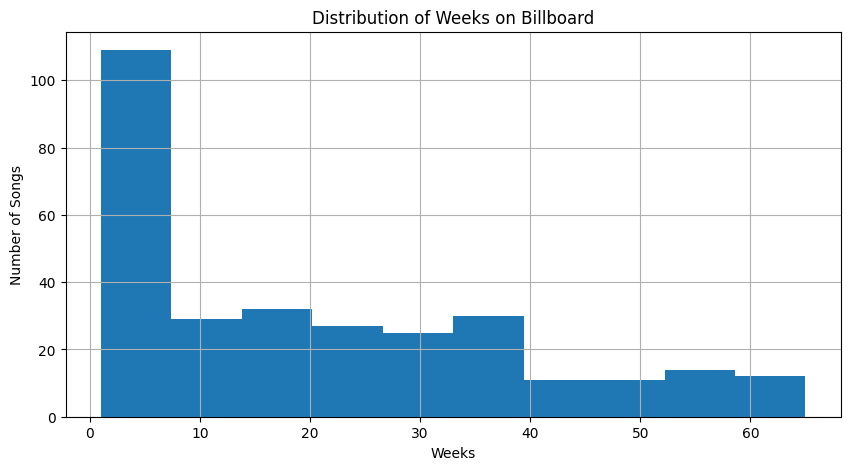

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df_songs['weeks_on_chart'].dropna())
plt.title('Distribution of Weeks on Billboard')
plt.xlabel('Weeks')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.savefig('rankings/static/images/weeks_distribution.png')
plt.show()

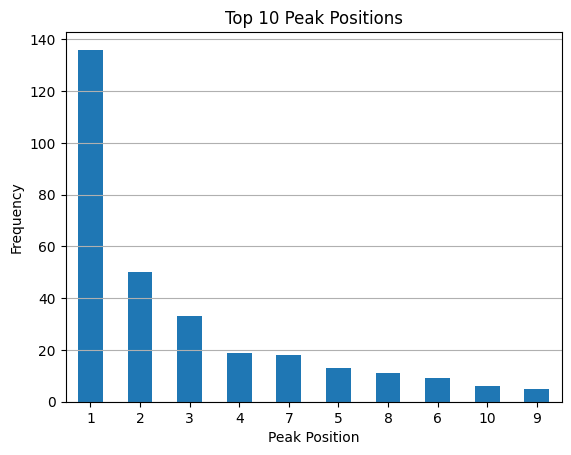

In [7]:
peak_counts = df_songs['peak_position'].value_counts().head(10)
peak_counts.plot(kind='bar')
plt.title('Top 10 Peak Positions')
plt.xlabel('Peak Position')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('rankings/static/images/peaks.png')
plt.show()

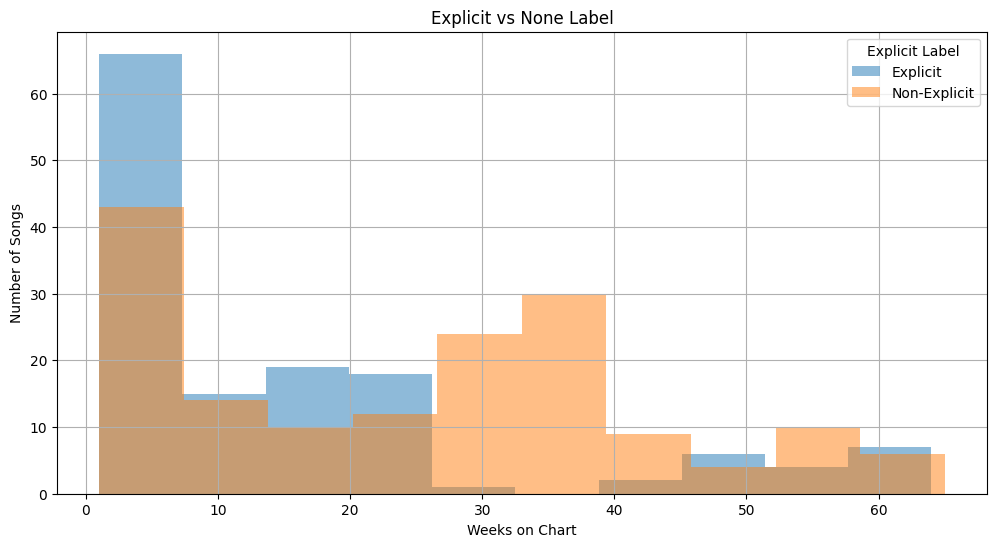

In [8]:
df_songs['is_explicit'] = df_songs['label'].apply(lambda x: 'Explicit' if 'EXPLICIT' in str(x) else 'Non-Explicit')
grouped = df_songs.groupby('is_explicit')['weeks_on_chart']
plt.figure(figsize=(12, 6))
for label, group in grouped:
    plt.hist(group, alpha=0.5, label=str(label))
plt.title('Explicit vs None Label')
plt.xlabel('Weeks on Chart')
plt.ylabel('Number of Songs')
plt.legend(title='Explicit Label')
plt.grid(True)
plt.savefig('rankings/static/images/labels.png')
plt.show()

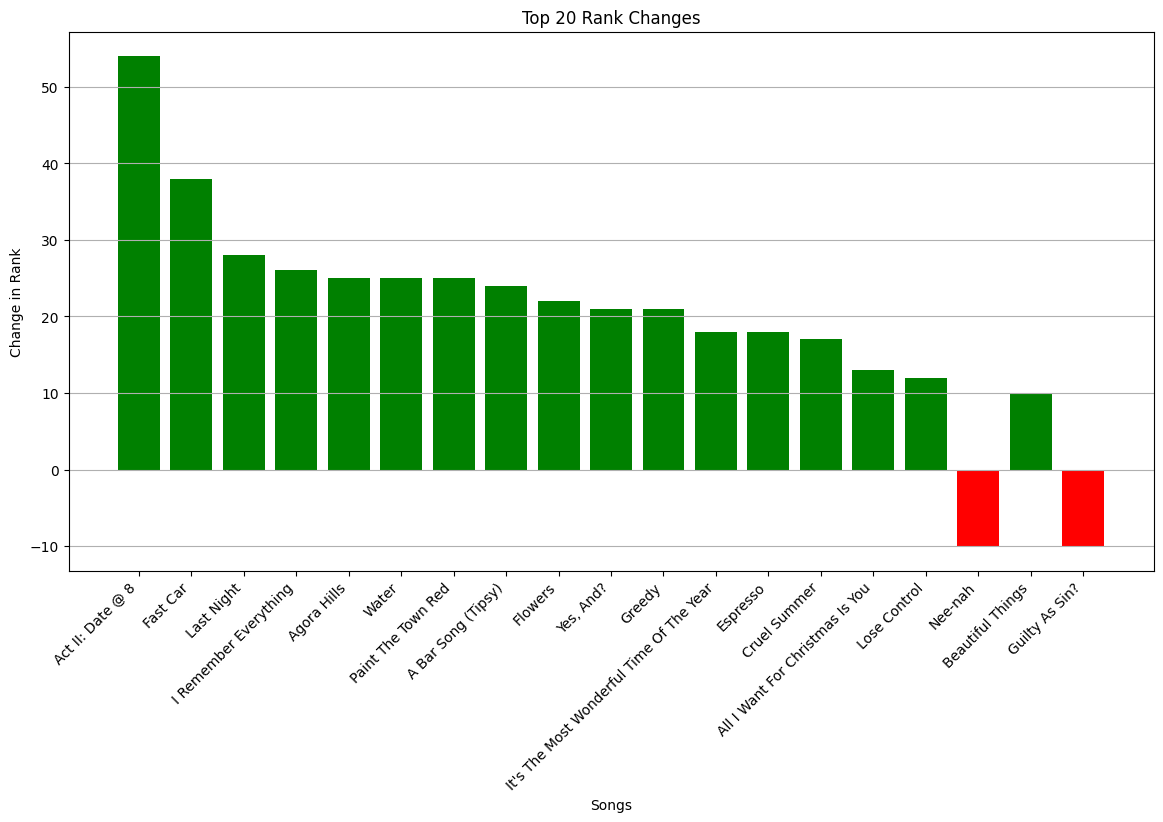

In [9]:
df_songs['rank_change'] = df_songs['last_week'] - df_songs['rank']
df_songs_filtered = df_songs[df_songs['last_week'].notna()]
df_songs_filtered = df_songs_filtered.sort_values(by='rank_change', key=abs, ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(df_songs_filtered['title'][:20], df_songs_filtered['rank_change'][:20], color=['red' if x < 0 else 'green' for x in df_songs_filtered['rank_change'][:20]])
plt.xlabel('Songs')
plt.ylabel('Change in Rank')
plt.title('Top 20 Rank Changes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.savefig('rankings/static/images/rank_changes.png')
plt.show()